budget analysis for the project

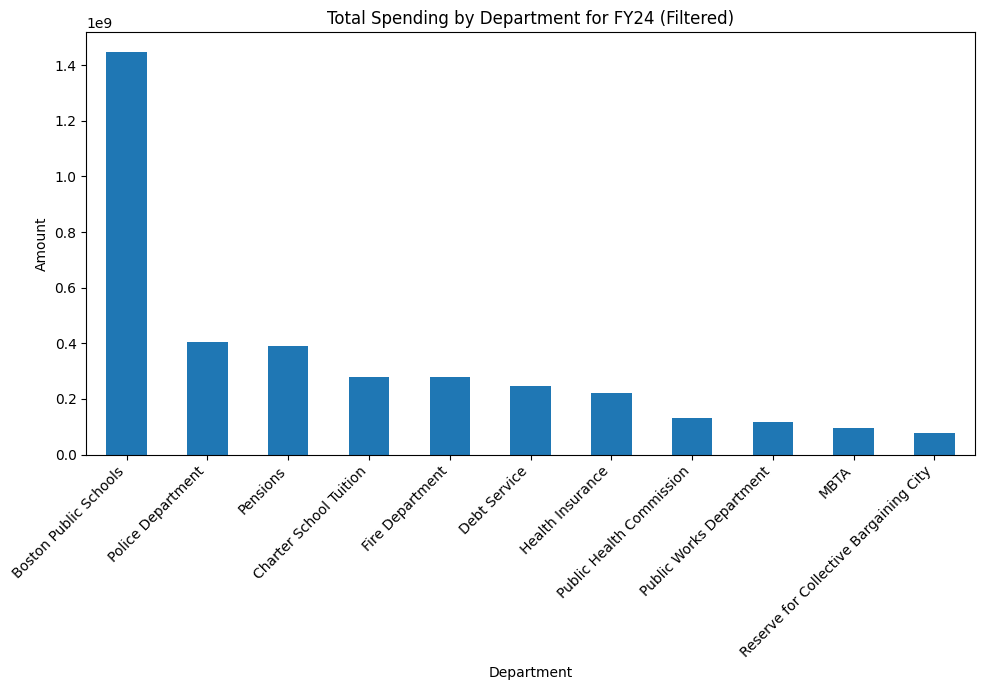

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

operating_budget = pd.read_csv('fy24-adopted-operating-budget.csv')


# Convert string to float, removing commas and other potential non-numeric characters

operating_budget['FY24 Adopted'] = operating_budget['FY24 Adopted'].replace('#Missing', np.nan)
operating_budget['FY24 Adopted'] = operating_budget['FY24 Adopted'].fillna(0)
operating_budget['FY24 Adopted'] = operating_budget['FY24 Adopted'].replace('[\$,]', '', regex=True).astype(float)
spending_by_department = operating_budget.groupby('Department')['FY24 Adopted'].sum().sort_values(ascending=False)
threshold = 50000000 #100,000,000

# Filter out departments with spending below the threshold
filtered_spending = spending_by_department[spending_by_department > threshold]


plt.figure(figsize=(10,7))

# Plot the filtered data
filtered_spending.plot(kind='bar')

# Adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # 'ha' stands for horizontal alignment

plt.title('Total Spending by Department for FY24 (Filtered)')
plt.ylabel('Amount')
plt.tight_layout()  # This ensures that all labels and titles are within the figure bounds
plt.show()

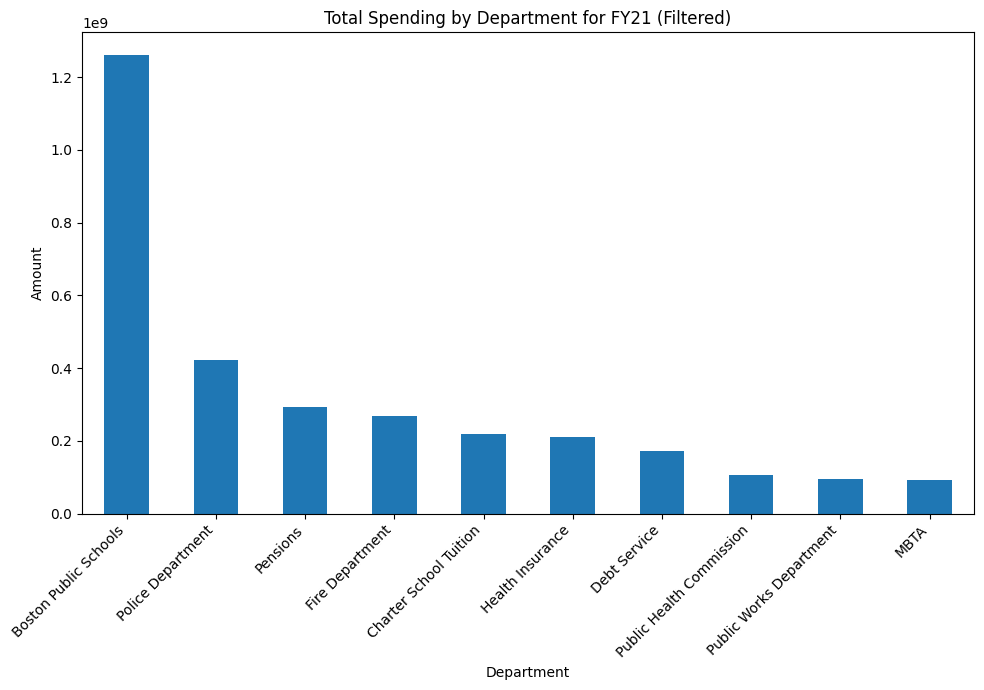

In [3]:
# For FY21 Actual Expense
operating_budget['FY21 Actual Expense'] = operating_budget['FY21 Actual Expense'].replace('\s*#\s*Missing\s*', np.nan, regex=True)
operating_budget['FY21 Actual Expense'] = operating_budget['FY21 Actual Expense'].replace('[\$,]', '', regex=True).astype(float)
operating_budget['FY21 Actual Expense'] = operating_budget['FY21 Actual Expense'].fillna(0)
spending_by_department_FY21 = operating_budget.groupby('Department')['FY21 Actual Expense'].sum().sort_values(ascending=False)

threshold = 50000000  # 100,000,000

# Filter out departments with spending below the threshold
filtered_spending_FY21 = spending_by_department_FY21[spending_by_department_FY21 > threshold]

plt.figure(figsize=(10,7))

# Plot the filtered data
filtered_spending_FY21.plot(kind='bar')

# Adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # 'ha' stands for horizontal alignment

plt.title('Total Spending by Department for FY21 (Filtered)')
plt.ylabel('Amount')
plt.tight_layout()  # This ensures that all labels and titles are within the figure bounds
plt.show()


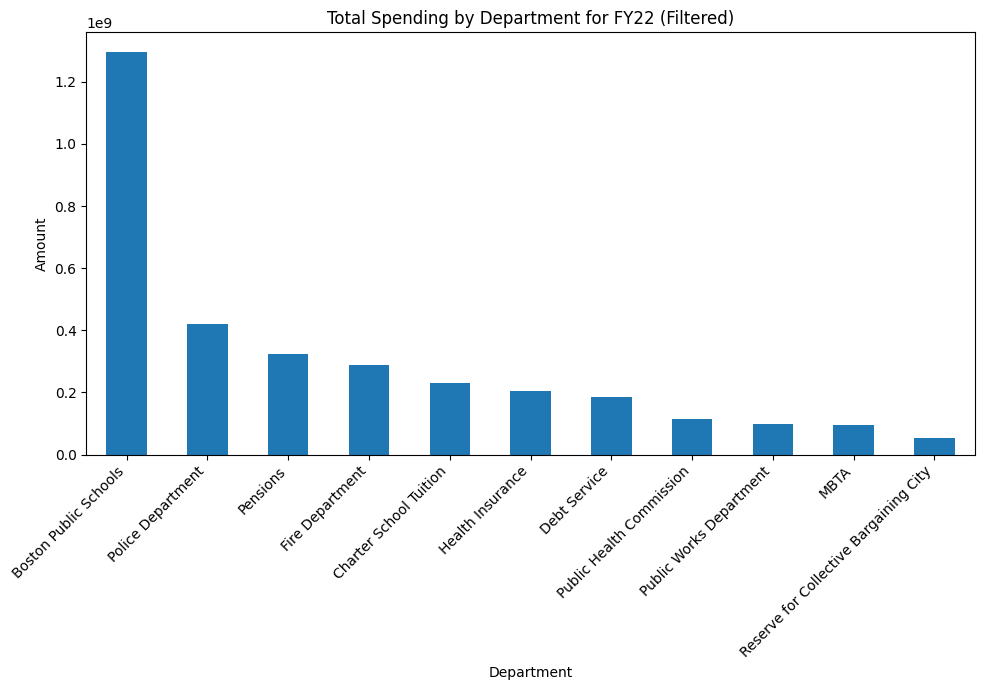

In [4]:
# For FY22 Actual Expense
operating_budget['FY22 Actual Expense'] = operating_budget['FY22 Actual Expense'].replace('\s*#\s*Missing\s*', np.nan, regex=True)
operating_budget['FY22 Actual Expense'] = operating_budget['FY22 Actual Expense'].replace('[\$,]', '', regex=True).astype(float)
operating_budget['FY22 Actual Expense'] = operating_budget['FY22 Actual Expense'].fillna(0)
spending_by_department_FY22 = operating_budget.groupby('Department')['FY22 Actual Expense'].sum().sort_values(ascending=False)

threshold = 50000000  # 100,000,000

# Filter out departments with spending below the threshold
filtered_spending_FY22 = spending_by_department_FY22[spending_by_department_FY22 > threshold]

plt.figure(figsize=(10,7))

# Plot the filtered data for FY22
filtered_spending_FY22.plot(kind='bar')

# Adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # 'ha' stands for horizontal alignment

plt.title('Total Spending by Department for FY22 (Filtered)')
plt.ylabel('Amount')
plt.tight_layout()  # This ensures that all labels and titles are within the figure bounds
plt.show()


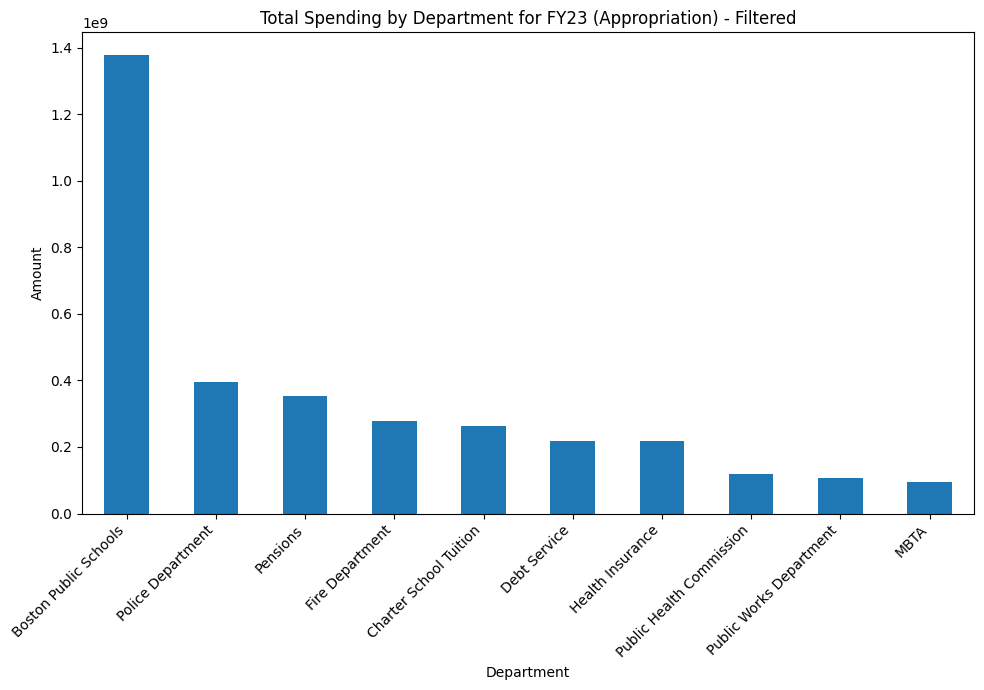

In [5]:

# For FY23 Appropriation
operating_budget['FY23 Appropriation'] = operating_budget['FY23 Appropriation'].replace('\s*#\s*Missing\s*', np.nan, regex=True)
operating_budget['FY23 Appropriation'] = operating_budget['FY23 Appropriation'].replace('[\$,]', '', regex=True).astype(float)
operating_budget['FY23 Appropriation'] = operating_budget['FY23 Appropriation'].fillna(0)
spending_by_department_FY23 = operating_budget.groupby('Department')['FY23 Appropriation'].sum().sort_values(ascending=False)
threshold = 50000000  # 100,000,000

# Filter out departments with spending below the threshold
filtered_spending_FY23 = spending_by_department_FY23[spending_by_department_FY23 > threshold]

plt.figure(figsize=(10,7))

# Plot the filtered data for FY23
filtered_spending_FY23.plot(kind='bar')

# Adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # 'ha' stands for horizontal alignment

plt.title('Total Spending by Department for FY23 (Appropriation) - Filtered')
plt.ylabel('Amount')
plt.tight_layout()  # This ensures that all labels and titles are within the figure bounds
plt.show()


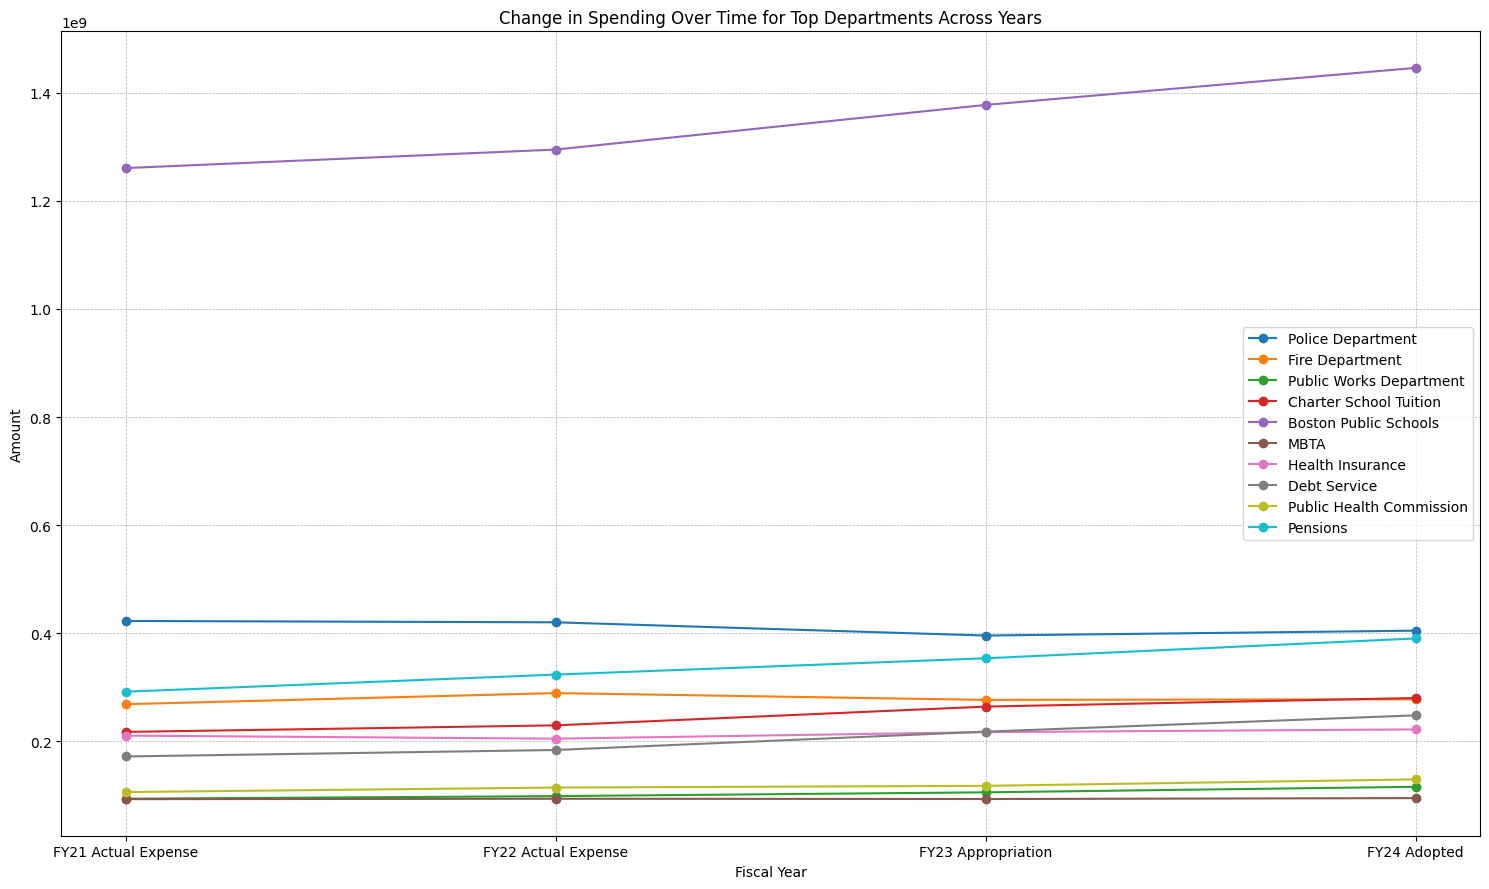

In [6]:
# 1. Identify the top 5 departments for each year
top_departments_FY21 = operating_budget.groupby('Department')['FY21 Actual Expense'].sum().nlargest(10).index.tolist()
top_departments_FY22 = operating_budget.groupby('Department')['FY22 Actual Expense'].sum().nlargest(10).index.tolist()
top_departments_FY23 = operating_budget.groupby('Department')['FY23 Appropriation'].sum().nlargest(10).index.tolist()
top_departments_FY24 = spending_by_department.head(10).index.tolist()

# Combine and remove duplicates
all_top_departments = list(set(top_departments_FY21 + top_departments_FY22 + top_departments_FY23 + top_departments_FY24))

# 2. Extract data for these top departments across years
top_data = operating_budget[operating_budget['Department'].isin(all_top_departments)]
grouped_top = top_data.groupby('Department')[['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']].sum().T

# 3. Plot the data
plt.figure(figsize=(15,9))

for department in all_top_departments:
    plt.plot(grouped_top.index, grouped_top[department], label=department, marker='o')

plt.title('Change in Spending Over Time for Top Departments Across Years')
plt.ylabel('Amount')
plt.xlabel('Fiscal Year')
plt.legend(loc="best")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Capital budget analysis
This data set is the FY24-28 Boston Capital plan.

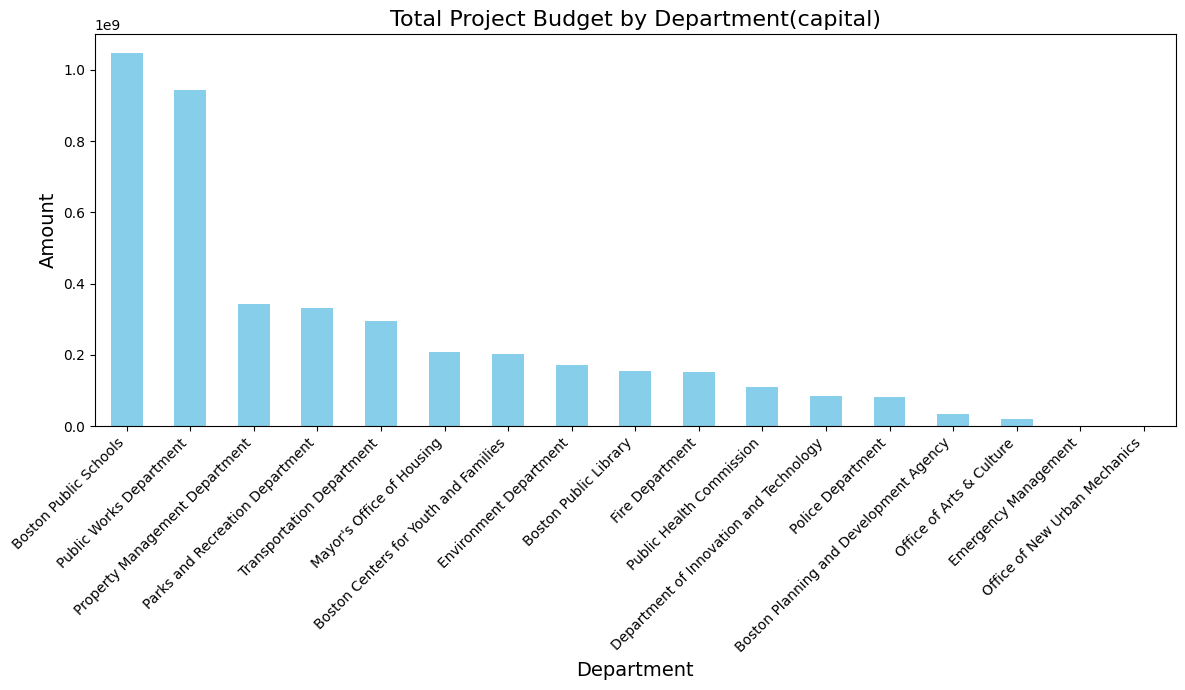

In [7]:
capital_budget = pd.read_csv('fy24-capital-budget-plan-recommended.csv')

# Process the Total_Project_Budget column
capital_budget['Total_Project_Budget'] = capital_budget['Total_Project_Budget'].replace('\s*#\s*Missing\s*', np.nan, regex=True)
capital_budget['Total_Project_Budget'] = capital_budget['Total_Project_Budget'].replace('[\$,]', '', regex=True).astype(float)
capital_budget['Total_Project_Budget'] = capital_budget['Total_Project_Budget'].fillna(0)

# Sum the spending by department
spending_by_department_capital = capital_budget.groupby('Department')['Total_Project_Budget'].sum().sort_values(ascending=False)

# Setting up the figure and axis
plt.figure(figsize=(12, 7))

# Plotting the spending by department
spending_by_department_capital.plot(kind='bar', color='skyblue')

# Setting the title and labels
plt.title('Total Project Budget by Department(capital)', fontsize=16)
plt.ylabel('Amount', fontsize=14)
plt.xlabel('Department', fontsize=14)

# Adjusting the x-ticks to ensure readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ensuring layout is tight so everything fits
plt.tight_layout()

# Displaying the plot
plt.show()




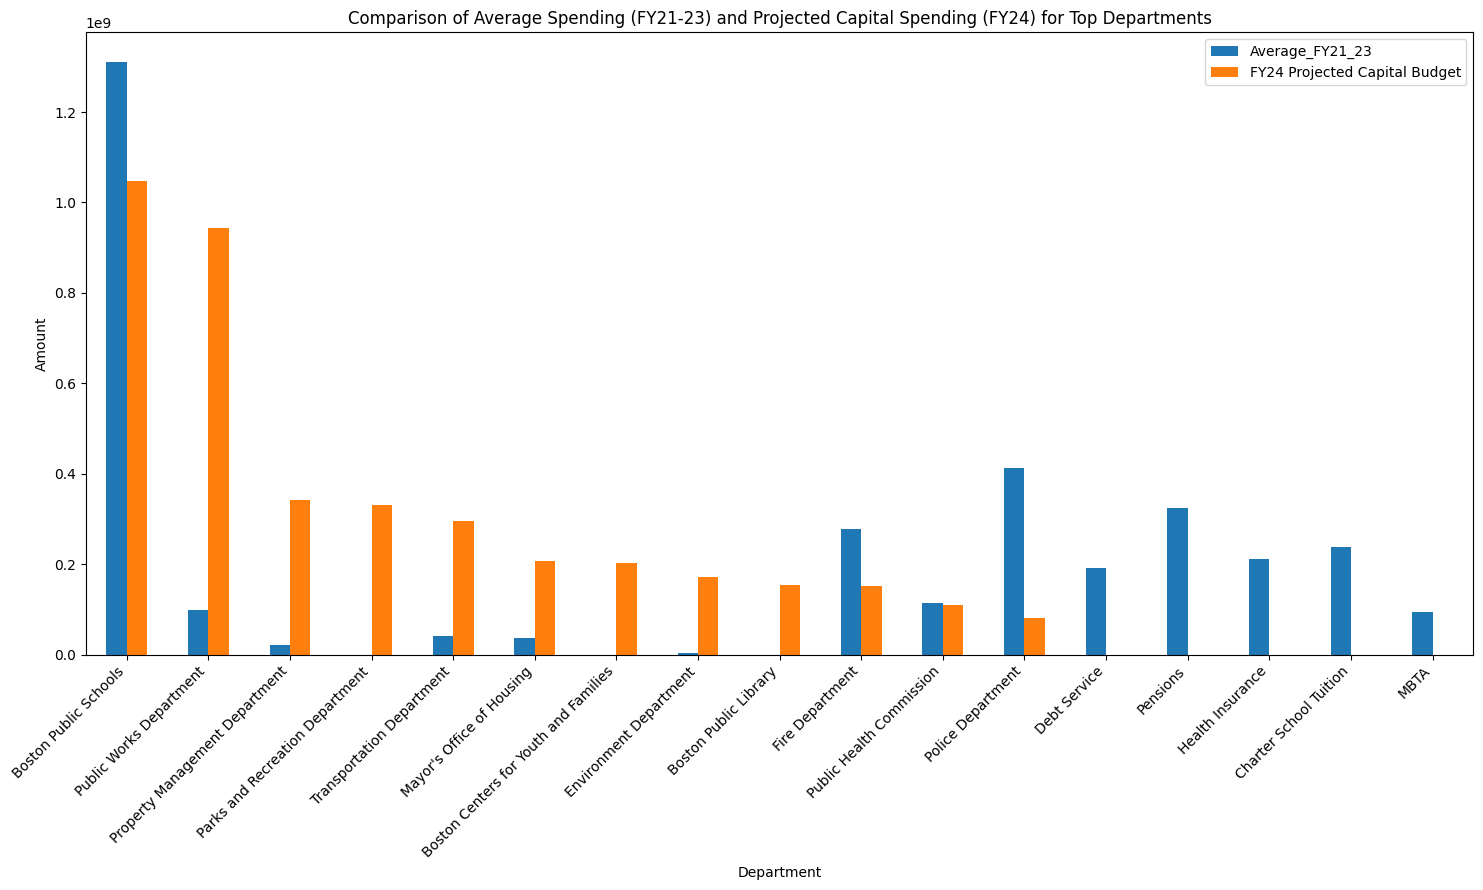

In [18]:
# Getting the top departments from the FY24 capital budget
top_departments_FY24_capital = spending_by_department_capital.head(10).index.tolist()

# Combine all the top department lists
all_top_departments = list(set(top_departments_FY21 + top_departments_FY22 + top_departments_FY23 + top_departments_FY24_capital))

# Calculate average spending for FY21-23
operating_budget['Average_FY21_23'] = operating_budget[['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation']].mean(axis=1)
avg_expenses_per_department = operating_budget.groupby('Department')['Average_FY21_23'].sum()

# Initialize the comparison DataFrame
comparison_data = pd.DataFrame(index=all_top_departments, 
                               columns=["Average_FY21_23", "FY24 Projected Capital Budget"])

# Fill in the data for FY21-23 and FY24
comparison_data["Average_FY21_23"] = comparison_data.index.map(lambda dept: avg_expenses_per_department.get(dept, 0))
comparison_data["FY24 Projected Capital Budget"] = comparison_data.index.map(lambda dept: spending_by_department_capital.get(dept, 0))

# Plotting
comparison_data.sort_values(by="FY24 Projected Capital Budget", ascending=False).plot(kind='bar', figsize=(15,9))
plt.title('Comparison of Average Spending (FY21-23) and Projected Capital Spending (FY24) for Top Departments')
plt.ylabel('Amount')
plt.xlabel('Department')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
